In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd

dataPath = '/content/drive/MyDrive/Partage Full CloudiAtlas/Cloud_iAtlas'
df = pd.read_csv(dataPath+'/train_enriched.csv')

In [ ]:
df.head()

,Image_Label,EncodedPixels,ratio,xmin,xmax,ymin,ymax,x_c,y_c,height,width
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0.999997,317,1253,189,1183,785.0,686.0,937,995
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0.974195,313,1365,968,2094,839.0,1531.0,1053,1127
2,0011165.jpg_Gravel,-1,0.000000,1400,0,2100,0,700.0,1050.0,-1399,-2099
3,0011165.jpg_Sugar,-1,0.000000,1400,0,2100,0,700.0,1050.0,-1399,-2099
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,0.995746,9,889,167,2086,449.0,1126.5,881,1920


In [ ]:
df.describe()

,ratio,xmin,xmax,ymin,ymax,x_c,y_c,height,width
count,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000
mean,0.453958,813.504373,591.369320,1213.957176,886.893707,702.436846,1050.425442,-221.135052,-326.063469
std,0.446542,595.067365,597.300588,902.531990,906.835101,193.082022,307.995637,1128.106224,1701.288493
min,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,109.500000,-1399.000000,-2099.000000
25%,0.000000,149.000000,0.000000,181.000000,0.000000,697.000000,1048.500000,-1399.000000,-2099.000000
50%,0.466466,886.500000,536.500000,1369.000000,725.000000,700.000000,1050.000000,343.000000,493.500000
75%,0.950052,1400.000000,1252.000000,2100.000000,1963.000000,707.000000,1059.000000,802.000000,1205.250000
max,1.000000,1400.000000,1399.000000,2100.000000,2099.000000,1347.500000,2020.500000,1400.000000,2100.000000


In [ ]:
# ATTENTION x_c et y_c ont été inversé

In [29]:
x = 2100
y = 1400

In [30]:
df['x1'] = df['ymin']/x       # ATTENTION xmin et ymin ont été inversé
df['x2'] = df['ymax']/x       # ATTENTION xmax et ymax ont été inversé
df['xmoy'] = df['y_c']/x      # ATTENTION x_c et y_c ont été inversé
df['width'] = df['width']/x

df['y1'] = df['xmin']/y       # ATTENTION xmin et ymin ont été inversé
df['y2'] = df['xmax']/y       # ATTENTION xmax et ymax ont été inversé
df['ymoy'] = df['x_c']/y      # ATTENTION x_c et y_c ont été inversé
df['height'] = df['height']/y

df = df.drop(['x_c', 'y_c', 'xmin', 'xmax', 'ymin', 'ymax'], axis = 1)

In [ ]:
df.head()

,Image_Label,EncodedPixels,ratio,height,width,x1,x2,xmoy,y1,y2,ymoy
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0.999997,0.669286,0.473810,0.090000,0.563333,0.326667,0.226429,0.895,0.560714
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0.974195,0.752143,0.536667,0.460952,0.997143,0.729048,0.223571,0.975,0.599286
2,0011165.jpg_Gravel,-1,0.000000,-0.999286,-0.999524,1.000000,0.000000,0.500000,1.000000,0.000,0.500000
3,0011165.jpg_Sugar,-1,0.000000,-0.999286,-0.999524,1.000000,0.000000,0.500000,1.000000,0.000,0.500000
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,0.995746,0.629286,0.914286,0.079524,0.993333,0.536429,0.006429,0.635,0.320714


In [31]:
df['file_name'] = df['Image_Label'].apply(lambda x: x.split("_")[0])
df['cloud_class'] = df['Image_Label'].apply(lambda x: x.split("_")[1])

# df['has_class'] = df['EncodedPixels'].isnull()
df['has_class'] = df['EncodedPixels'].apply(lambda x: 0 if x == -1 else 1)

In [ ]:
df.head()

,Image_Label,EncodedPixels,ratio,height,width,x1,x2,xmoy,y1,y2,ymoy,file_name,cloud_class,has_class
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0.999997,0.669286,0.473810,0.090000,0.563333,0.326667,0.226429,0.895,0.560714,0011165.jpg,Fish,1
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0.974195,0.752143,0.536667,0.460952,0.997143,0.729048,0.223571,0.975,0.599286,0011165.jpg,Flower,1
2,0011165.jpg_Gravel,-1,0.000000,-0.999286,-0.999524,1.000000,0.000000,0.500000,1.000000,0.000,0.500000,0011165.jpg,Gravel,1
3,0011165.jpg_Sugar,-1,0.000000,-0.999286,-0.999524,1.000000,0.000000,0.500000,1.000000,0.000,0.500000,0011165.jpg,Sugar,1
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,0.995746,0.629286,0.914286,0.079524,0.993333,0.536429,0.006429,0.635,0.320714,002be4f.jpg,Fish,1


In [32]:
df2 = pd.read_csv(dataPath+'/cloud_class.csv')
df2.head()

,file_name,cloud_class_Fish,cloud_class_Flower,cloud_class_Gravel,cloud_class_Sugar,nb_class
0,0011165.jpg,1,1,0,0,2
1,002be4f.jpg,1,1,0,1,3
2,0031ae9.jpg,1,1,0,1,3
3,0035239.jpg,0,1,1,0,2
4,003994e.jpg,1,0,1,1,3


In [33]:
## On ne garde que les images mono class
df2 = df2[df2['nb_class']==1]
df2.head()

,file_name,cloud_class_Fish,cloud_class_Flower,cloud_class_Gravel,cloud_class_Sugar,nb_class
5,00498ec.jpg,0,0,1,0,1
8,008233e.jpg,0,0,0,1,1
11,0095357.jpg,0,0,0,1,1
17,00d4443.jpg,0,0,0,1,1
20,0104b5b.jpg,0,0,0,1,1


In [34]:
## On ne garde que les encoded pixels avec un ratio >0.75
df = df[df['ratio']>0.80]
print(df.shape)
df.head()

(8441, 14)


,Image_Label,EncodedPixels,ratio,height,width,x1,x2,xmoy,y1,y2,ymoy,file_name,cloud_class,has_class
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0.999997,0.669286,0.473810,0.090000,0.563333,0.326667,0.226429,0.895000,0.560714,0011165.jpg,Fish,1
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0.974195,0.752143,0.536667,0.460952,0.997143,0.729048,0.223571,0.975000,0.599286,0011165.jpg,Flower,1
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,0.995746,0.629286,0.914286,0.079524,0.993333,0.536429,0.006429,0.635000,0.320714,002be4f.jpg,Fish,1
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...,0.999998,0.370714,0.543810,0.455238,0.998571,0.726905,0.627143,0.997143,0.812143,002be4f.jpg,Flower,1
7,002be4f.jpg_Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...,1.000000,0.250000,0.427143,0.022857,0.449524,0.236190,0.210000,0.459286,0.334643,002be4f.jpg,Sugar,1


In [35]:
# Rassembler les dataFrames df et df2
masque = df['file_name'].isin(df2['file_name'])
df = df[masque]
print(df.shape)
df.head()

(998, 14)


,Image_Label,EncodedPixels,ratio,height,width,x1,x2,xmoy,y1,y2,ymoy,file_name,cloud_class,has_class
35,008233e.jpg_Sugar,910449 829 911849 829 913249 829 914649 829 91...,0.971020,0.651429,0.509524,0.309524,0.818571,0.564048,0.260714,0.911429,0.586071,008233e.jpg,Sugar,1
47,0095357.jpg_Sugar,1757754 373 1759154 373 1760554 373 1761954 37...,1.000000,0.266429,0.243333,0.597619,0.840476,0.719048,0.537857,0.803571,0.670714,0095357.jpg,Sugar,1
71,00d4443.jpg_Sugar,70287 806 71687 806 73087 806 74487 806 75887 ...,0.832580,0.575714,0.849048,0.023810,0.872381,0.448095,0.204286,0.779286,0.491786,00d4443.jpg,Sugar,1
104,0146ef3.jpg_Fish,274423 1263 275823 1263 277223 1263 278623 126...,1.000000,0.902143,0.740476,0.093333,0.833333,0.463333,0.015714,0.917143,0.466429,0146ef3.jpg,Fish,1
137,01c6ec3.jpg_Flower,18216 1074 19616 1074 21016 1074 22416 1074 23...,0.900545,0.767143,0.980952,0.006190,0.986667,0.496429,0.010714,0.777143,0.393929,01c6ec3.jpg,Flower,1


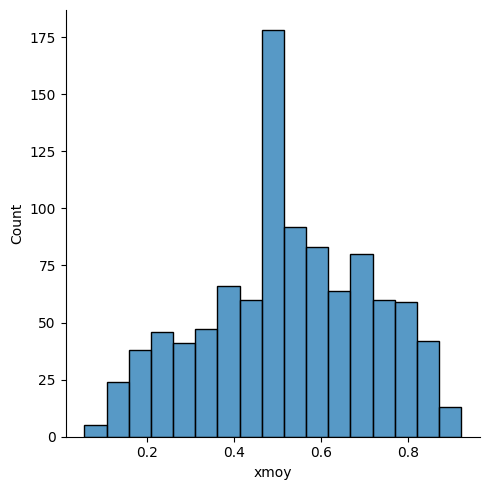

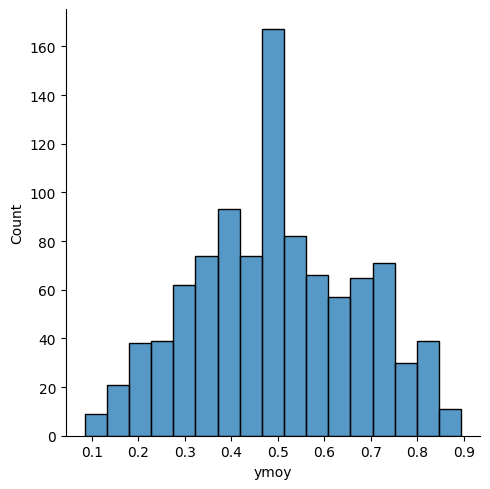

In [36]:
# Distribution des variables cibles
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df.xmoy)
plt.show()
sns.displot(df.ymoy)
plt.show()

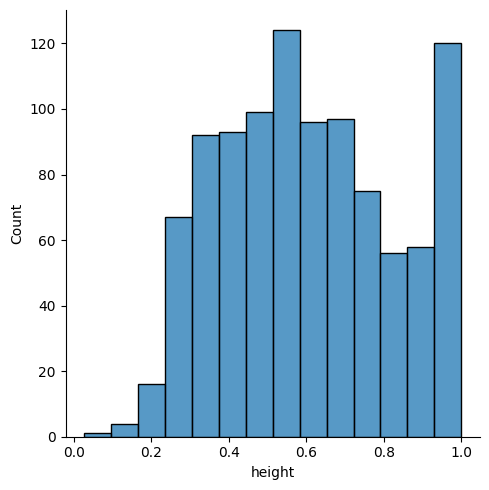

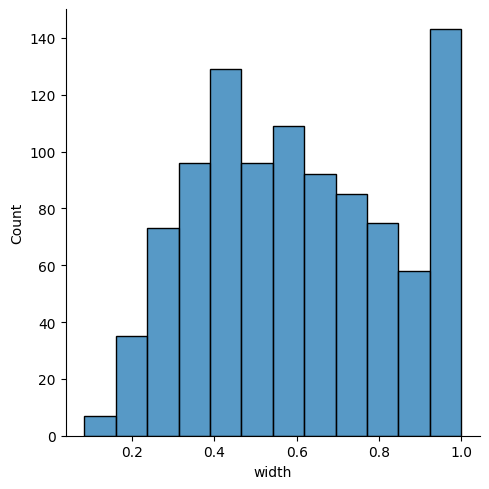

In [11]:
sns.displot(df.height)
plt.show()
sns.displot(df.width)
plt.show()

/content/drive/MyDrive/Partage Full CloudiAtlas/Outputs/train_images_525-350_gray/008233e.jpg
(350, 525, 1)


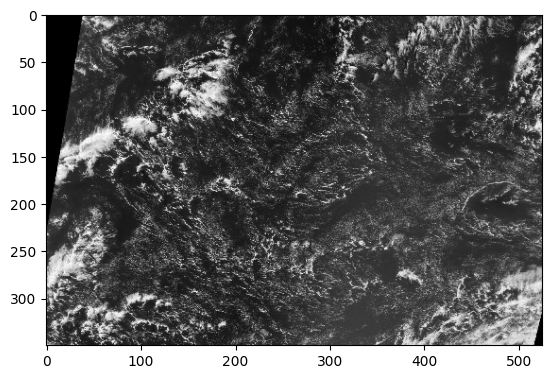

In [37]:
import tensorflow as tf
folder_images = '/content/drive/MyDrive/Partage Full CloudiAtlas/Outputs/train_images_525-350_gray/'

def load_image(filepath, resize=None):
    im = tf.io.read_file(folder_images + filepath)
    im = tf.image.decode_png(im, channels=1)
    #im = tf.image.resize(im, size=(256,256)) #Test_24
    #im = np.repeat(im, 3, axis=2) # TO DELETE, UNIQUEMENT POUR LE EFFICIENTNET
    if resize:
        return tf.image.resize(im, resize)
    else :
        return im

print(folder_images + df.file_name[35])
im = load_image(df.file_name[35])
print(im.shape)
plt.imshow(im, cmap='gray');

In [38]:
import numpy as np

def show_bounding_box(im, bbox, normalised=True, color='r'):
    # Signification de bbox
    x, y, w, h = bbox
    # Convertir les cordonées (x,y,w,h) en (x1,x2,y1,y2)
    x1=x-w/2
    x2=x+w/2
    y1=y-h/2
    y2=y+h/2

    # Redimensionner en cas de normalisation
    if normalised:
        x1=x1*im.shape[1]
        x2=x2*im.shape[1]
        y1=y1*im.shape[0]
        y2=y2*im.shape[0]

    # Afficher l'image
    plt.imshow(im, cmap='gray')

    # Afficher la bounding box
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1],color)

def show_bounding_box2(im, bbox, normalised=True, color='r'):
    # Signification de bbox
    x1, x2, y1, y2 = bbox

    # Redimensionner en cas de normalisation
    if normalised:
        x1=x1*im.shape[1]
        x2=x2*im.shape[1]
        y1=y1*im.shape[0]
        y2=y2*im.shape[0]

    # Afficher l'image
    plt.imshow(im, cmap='gray')

    # Afficher la bounding box
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1],"r")

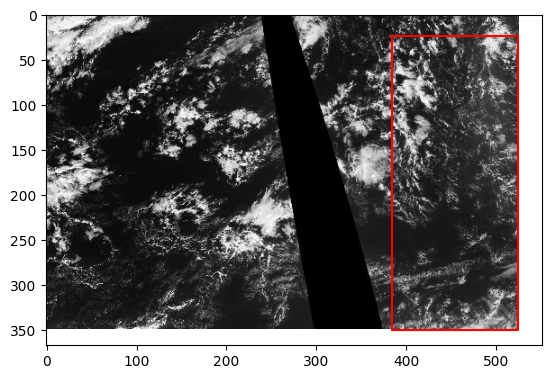

In [ ]:
idx = 137
# Array de l'image
im = load_image(df.file_name[idx])
# Coordonnées de la bounding box
bbox = df[['xmoy', 'ymoy', 'width', 'height']].values[idx]
# Afficher l'image ainsi que la bounding box
show_bounding_box(im, bbox)

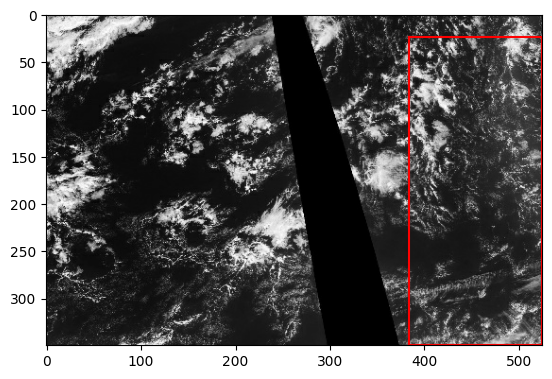

In [ ]:
idx = 137
# Array de l'image
im = load_image(df.file_name[idx])
# Coordonnées de la bounding box
bbox = df[['x1', 'x2', 'y1', 'y2']].values[idx]
# Afficher l'image ainsi que la bounding box
show_bounding_box2(im, bbox)

In [39]:
df = df.reset_index(drop=True)
df.head()

,Image_Label,EncodedPixels,ratio,height,width,x1,x2,xmoy,y1,y2,ymoy,file_name,cloud_class,has_class
0,008233e.jpg_Sugar,910449 829 911849 829 913249 829 914649 829 91...,0.971020,0.651429,0.509524,0.309524,0.818571,0.564048,0.260714,0.911429,0.586071,008233e.jpg,Sugar,1
1,0095357.jpg_Sugar,1757754 373 1759154 373 1760554 373 1761954 37...,1.000000,0.266429,0.243333,0.597619,0.840476,0.719048,0.537857,0.803571,0.670714,0095357.jpg,Sugar,1
2,00d4443.jpg_Sugar,70287 806 71687 806 73087 806 74487 806 75887 ...,0.832580,0.575714,0.849048,0.023810,0.872381,0.448095,0.204286,0.779286,0.491786,00d4443.jpg,Sugar,1
3,0146ef3.jpg_Fish,274423 1263 275823 1263 277223 1263 278623 126...,1.000000,0.902143,0.740476,0.093333,0.833333,0.463333,0.015714,0.917143,0.466429,0146ef3.jpg,Fish,1
4,01c6ec3.jpg_Flower,18216 1074 19616 1074 21016 1074 22416 1074 23...,0.900545,0.767143,0.980952,0.006190,0.986667,0.496429,0.010714,0.777143,0.393929,01c6ec3.jpg,Flower,1


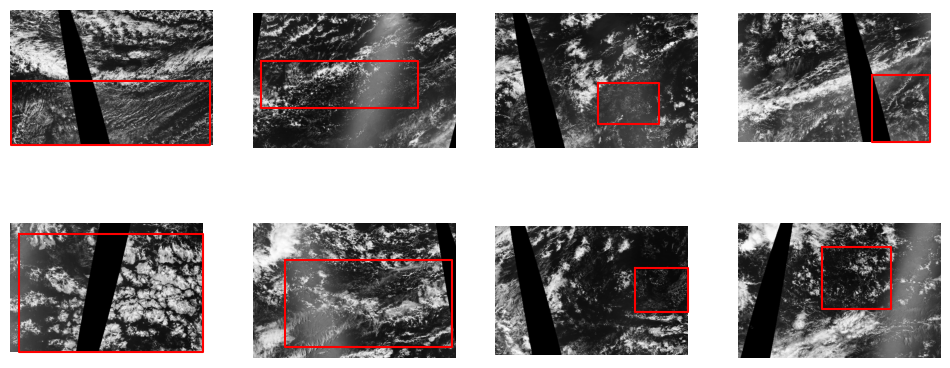

In [40]:
plt.figure(figsize=(12,5))
for j, i in enumerate(np.random.randint(0, len(df), size=[8])):
    plt.subplot(2,4,j+1)
    plt.axis('off')
    im = load_image(df.file_name[i])
    bbox = df[['xmoy', 'ymoy', 'width', 'height']].values[i]
    show_bounding_box(im, bbox, normalised=True)

In [41]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

X_train_path, X_test_path, y_train, y_test = train_test_split(df.file_name, df[['xmoy', 'ymoy', 'width', 'height']], train_size=0.8, random_state=1234)

X_test = []
for p in tqdm(X_test_path):
    im = load_image(p).numpy().astype(np.uint8) # load_image(p).astype(np.uint8)
    X_test.append(im)

X_test = np.array(X_test)

100%|██████████| 200/200 [00:01<00:00, 136.69it/s]


In [ ]:
X_test.shape

(200, 350, 525, 1)

In [ ]:
def load_image_tf(filepath, y, resize=(350, 525)):
    im = tf.io.read_file(folder_images + filepath)
    im = tf.image.decode_png(im, channels=1)
    #im = tf.image.resize(im, size=(256,256)) #Test_24
    #im = np.repeat(im, 3, axis=2) # TO DELETE, UNIQUEMENT POUR LE EFFICIENTNET

    # Find the max translation to keep the object in the image
    #print(resize[1]*(y[0]-y[2]/2), resize[1]*(y[0]+y[2]/2), resize[0]*(y[1]-y[3]/2), resize[0]*(y[1]+y[3]/2))
    tx_max = resize[1]*tf.nn.relu(1-(y[0]+y[2]/2))
    tx_min = -resize[1]*tf.nn.relu(y[0]-y[2]/2)
    ty_max = resize[0]*tf.nn.relu(1-(y[1]+y[3]/2))
    ty_min = -resize[0]*tf.nn.relu(y[1]-y[3]/2)
    #print(resize[0], tx_min.numpy(), tx_max.numpy())
    #print(resize[1], ty_min.numpy(), ty_max.numpy())
    tx = -np.random.uniform(tx_min, tx_max)
    ty = -np.random.uniform(ty_min, ty_max)
    #print(tx, ty)
    # Apply the transformation in the image
    im = tf.keras.preprocessing.image.apply_affine_transform(
    im.numpy(), theta=0, tx=tx, ty=ty, shear=0, zx=1, zy=1, row_axis=0, col_axis=1,
    channel_axis=2, fill_mode='nearest', cval=0.0, order=1)
    # Correct the target variable
    y_new = y.copy()
    #print("y_new")
    #print(y_new)
    y_new[0] += -tx/resize[1]
    y_new[1] += -ty/resize[0]

    return im, y_new

In [ ]:
df.loc[137, ['xmoy', 'ymoy', 'width', 'height']].values

array([0.865, 0.5325, 0.26857142857142857, 0.9328571428571428],
      dtype=object)

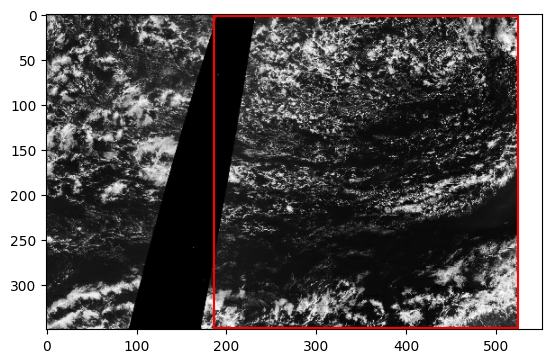

In [ ]:
idx = 21
# Array de l'image
im = load_image(df.file_name[idx])
# Coordonnées de la bounding box
bbox = df[['xmoy', 'ymoy', 'width', 'height']].values[idx]
# Afficher l'image ainsi que la bounding box
show_bounding_box(im, bbox)

[0.5371512493768401 0.4998182425247107 0.6438095238095238
 0.9914285714285714]


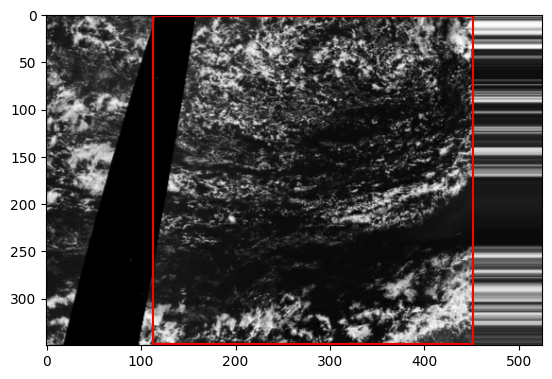

In [ ]:
idx = 21
# Array de l'image
im, y = load_image_tf(df.file_name[idx], df.loc[idx, ['xmoy', 'ymoy', 'width', 'height']].values)
# Afficher l'image ainsi que la bounding box
print(y)
show_bounding_box(im, y)

In [42]:
dataset_train = tf.data.Dataset.from_tensor_slices((X_train_path, y_train))
dataset_train = dataset_train.map(lambda x, y : [load_image(x), y], num_parallel_calls=-1)
dataset_train = dataset_train.batch(32)

In [43]:
import time
import cv2
t0 = time.time()
for p in X_test_path.values[:32]:
    load_image(p)

print('Time to load 32 image in a single thread method :', time.time()-t0, 's')

iterator= iter(dataset_train.take(1))
t0 = time.time()
next(iterator)
print('Time for a multi-threading method :', time.time()-t0, 's')

Time to load 32 image in a single thread method : 0.16910505294799805 s
Time for a multi-threading method : 0.16316962242126465 s


In [44]:
from tensorflow.keras.applications import EfficientNetB0

# Load the model efficientNet
efficientNet = EfficientNetB0(include_top=False, input_shape=(350, 525, 3))

# Freeze the backbone
for layer in efficientNet.layers:
    layer.trainable = False

In [45]:
im = load_image(df.file_name[0])
print(im.shape)
im = np.repeat(im, 3, axis=2)
print(im.shape)

(350, 525, 1)
(350, 525, 3)


In [46]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten
from tensorflow.keras.models import Model, Sequential, load_model

model = Sequential()
model.add(efficientNet)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 11, 17, 1280)      4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 1024)              1311744   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)              

In [47]:
## Insérez votre code ici

from tensorflow.keras.optimizers import SGD, Adam, RMSprop

lambda_regression=10

def loss_function2(y_true, y_pred):
    return lambda_regression*tf.reduce_mean(tf.square(y_true-y_pred), axis=-1)

def loss_function(y_true, y_pred):
    e1 = tf.abs(y_true[:,0] - y_pred[:,0])
    e2 = tf.abs(y_true[:,1] - y_pred[:,1])
    e3 = (tf.sqrt(tf.abs(y_pred[:,2])) - tf.sqrt(y_true[:,2]))**2
    e4 = (tf.sqrt(tf.abs(y_pred[:,3])) - tf.sqrt(y_true[:,3]))**2
    s = e1 + e2 + e3 + e4
    loss = tf.reduce_sum(s) / 32
    return loss

def loss_function3(y_true, y_pred):
    loss = 1 #definir IoU
    mask_true = np.zeros(350, 525)
    mask_pred = np.zeros(350, 525)
    (y_true[0]-y_true[3])*525
    return loss

# def loss_function(y_true, y_pred):
#     return lambda_coord*tf.reduce_mean(tf.square(y_true[...,:2]-y_pred[...,:2]), axis=-1) + lambda_largeur*tf.reduce_mean(tf.square(y_true[...,2:4]-y_pred[...,2:4]), axis=-1)


model.compile(loss=loss_function, optimizer=Adam(1e-3), metrics = ['accuracy'])

In [ ]:
## Insérez votre code ici

model.fit_generator(dataset_train, epochs=3)

model.save('/content/drive/MyDrive/Partage Full CloudiAtlas/Cloud_iAtlas/first_model_test.h5')
model.save('/content/drive/MyDrive/Partage Full CloudiAtlas/Cloud_iAtlas/first_model_test.keras')



#model.save('first_model.h5')
#model.save('first_model.keras')
#from google.colab import files

#files.download('first_model.h5')
#files.download('first_model.keras')

Epoch 1/3


<ipython-input-24-ca635d26ce5a>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(dataset_train, epochs=3)


25/25 [==============================] - 160s 6s/step - loss: 1.0750
Epoch 2/3
25/25 [==============================] - 5s 204ms/step - loss: 0.4454
Epoch 3/3
25/25 [==============================] - 5s 196ms/step - loss: 0.3876


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#model.save('first_model.h5')
#model.save('first_model.keras')
#from google.colab import files

#files.download('first_model.h5')
#files.download('first_model.keras')

In [48]:
from tensorflow.keras.utils import custom_object_scope

# Définissez une fonction pour charger le modèle en utilisant le custom_object_scope
def load_model_with_custom_objects(model_path):
    with custom_object_scope({'loss_function': loss_function}):
        modele_charge = tf.keras.models.load_model(model_path)
    return modele_charge

# Chargez le modèle en utilisant la fonction définie
modele_charge = load_model_with_custom_objects('/content/drive/MyDrive/Partage Full CloudiAtlas/Cloud_iAtlas/first_model.h5')
model = modele_charge
# model = tf.keras.models.load_model('/content/drive/MyDrive/Partage Full CloudiAtlas/Cloud_iAtlas/first_model.h5')


In [ ]:
y_test.shape
index_ligne = 16  # Indice de la 15ème ligne (indice 14 car l'index commence à 0)
y = y_test.iloc[index_ligne]
print(y)
[y[0], y[1], y[2], y[3]]

int((y[0]-y[2])*525), int((y[0]+y[2])*525), int((y[1]-y[3])*350), int((y[1]+y[3])*350)

0.25357142857142856 0.3267857142857143 0.5019047619047619 0.5557142857142857
1/1 [==============================] - 3s 3s/step
0.35192373 0.44213772 -0.53108114 0.5152735
Execution time : 3.0745959281921387 secondes


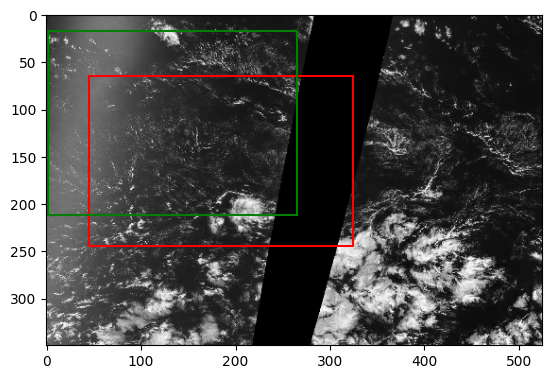

In [49]:
import time
def show_img(img, model):
  plt.imshow(img)
  t0=time.time()
  x, y, w, h = model.predict(np.array([img], dtype=np.float32))[0]
  print(x, y, w, h)
  print("Execution time :",time.time()-t0,"secondes")
  show_bounding_box(img/255, [x,y,w,h])
  plt.show()

def show_img2(img, model,y_true):
  print(y_true[0], y_true[1], y_true[2], y_true[3])
  plt.imshow(img)
  t0=time.time()
  x, y, w, h = model.predict(np.array([img], dtype=np.float32))[0]
  print(x, y, w, h)
  print("Execution time :",time.time()-t0,"secondes")
  show_bounding_box(img/255, [x,y,w,h])
  show_bounding_box(img/255, [y_true[0], y_true[1], y_true[2], y_true[3]], color = 'g')
  plt.show()
## Exemple :
# show_img(load_image(X_train_path[10]).numpy().astype(np.uint8), model)
sample = 17
show_img2(X_test[sample], model, y_test.iloc[sample])

11/11 [==============================] - 1s 49ms/step


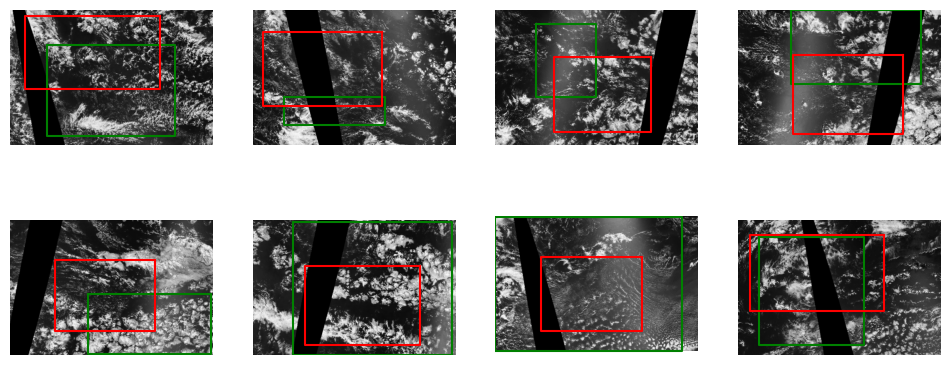

In [56]:

def show_bounding_box_true_pred(im, bbox, bbox_pred, normalised=True):
    # Afficher l'image
    plt.imshow(im, cmap='gray')

    i = 0
    c = ['g', 'r']
    for b in (bbox, bbox_pred):
      # Signification de bbox
      x, y, w, h = b
      # Convertir les cordonées (x,y,w,h) en (x1,x2,y1,y2)
      x1=x-w/2
      x2=x+w/2
      y1=y-h/2
      y2=y+h/2
      # Redimensionner en cas de normalisation
      if normalised:
        x1=x1*im.shape[1]
        x2=x2*im.shape[1]
        y1=y1*im.shape[0]
        y2=y2*im.shape[0]
      # Afficher la bounding box
      plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1],c[i])
      i = i+1

plt.figure(figsize=(12,5))
for j, i in enumerate(np.random.randint(0, len(X_test), size=[8])):
    plt.subplot(2,4,j+1)
    plt.axis('off')
    bbox = df[['xmoy', 'ymoy', 'width', 'height']].values[i]
    bbox_pred = model.predict(np.array(X_test[i], dtype=np.float32))[0]
    show_bounding_box_true_pred(X_test[i], bbox, bbox_pred, normalised=True)



In [22]:
dataset_test = tf.data.Dataset.from_tensor_slices((X_test_path, y_test))
dataset_test = dataset_test.map(lambda x, y : [load_image(x), y], num_parallel_calls=-1)
dataset_test = dataset_test.batch(32)

In [26]:
history = model.fit(dataset_train, epochs=3, validation_data=dataset_test)


Epoch 1/3
25/25 [==============================] - 319s 12s/step - loss: 0.3854 - accuracy: 0.1892 - val_loss: 0.3337 - val_accuracy: 0.2600
Epoch 2/3
25/25 [==============================] - 334s 14s/step - loss: 0.3694 - accuracy: 0.1930 - val_loss: 0.3290 - val_accuracy: 0.1900
Epoch 3/3
25/25 [==============================] - 311s 12s/step - loss: 0.3618 - accuracy: 0.2080 - val_loss: 0.3363 - val_accuracy: 0.1400


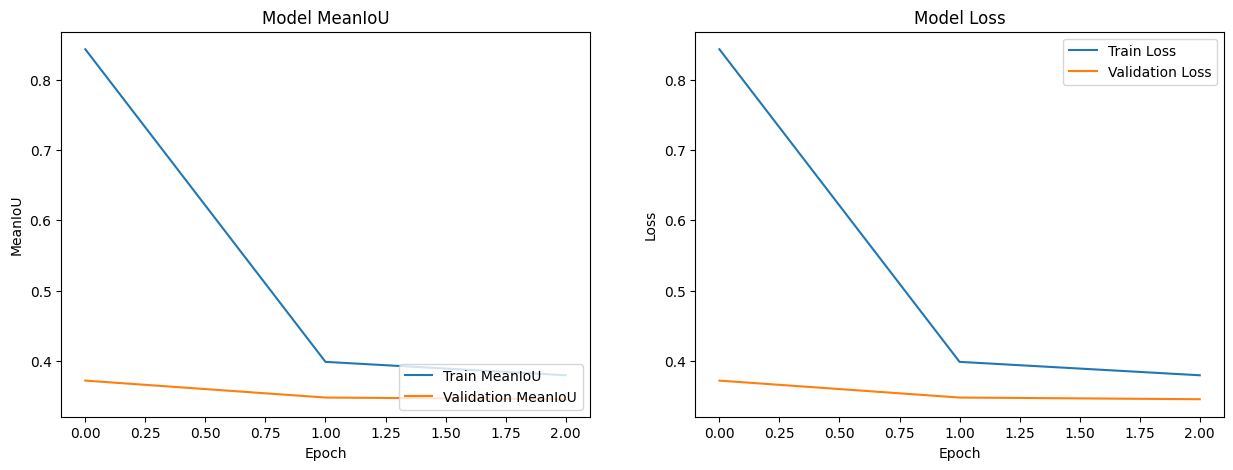

In [24]:
# Création d'une figure avec 2 subplots: (1 ligne, 2 colonnes)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Graphique de gauche: Accuracy
axs[0].plot(history.history['loss'], label='Train MeanIoU')
axs[0].plot(history.history['val_mean_io_u_1'], label='Validation MeanIoU')
axs[0].set_title('Model MeanIoU')
axs[0].set_ylabel('MeanIoU')
axs[0].set_xlabel('Epoch')
axs[0].legend(loc='lower right')

# Graphique de droite: Loss
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(loc='upper right')

# Affichage des graphiques
plt.show()